In [156]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt

In [98]:
def getPage(make, model, page):
    webpage = "https://www.truecar.com/used-cars-for-sale/listings/{}/{}/location-brooklyn-ny/?onlineDealers=none&page={}&searchRadius=25".format(make, model, page)
    page = BeautifulSoup(requests.get(webpage).content, "html.parser")    
    table = page.find_all('li',class_="margin-top-3 d-flex flex-grow col-md-6 col-xl-4")
    return table

In [99]:
def searchTrueCar(make, model, page):
    car_dict = {'id':[], 'year':[], 'make':[], 'model':[], 'trim':[], 'price':[], 
                'rating':[], 'diff':[], 'mileage':[], 'excolor':[], 'intcolor':[], 
                'accidents':[], 'owners':[], 'use':[]}
    for i in range(1, page):
        print('page: ', i)
        results = getPage(make, model, i)
        for car in results:
            try:
                id_ = re.search("(?<=(listing\/))(.*?)(?=(\/2))", car.find('a', class_="linkable order-2 vehicle-card-overlay", href=True)['href']).group()
                car_dict['id'].append(id_)
            except AttributeError:
                print('Out of Listings.')
                break

            year = car.find('span', class_="vehicle-card-year font-size-1").text
            car_dict['year'].append(year)

            makemodel = car.find('span', class_="vehicle-header-make-model text-truncate").text.split(' ')
            car_dict['make'].append(makemodel[0])
            car_dict['model'].append(makemodel[1])

            trim = car.find_all('div', class_="font-size-1 text-truncate")[0].text
            car_dict['trim'].append(trim)
            
            try:
                price = car.find('div', class_="heading-3 margin-y-1 font-weight-bold").text
                car_dict['price'].append(float(re.sub(r'[^\d.]', '', price)))
            except AttributeError:
                car_dict['price'].append('None')
            
            try:
                rating = car.find('span', class_="graph-icon-title margin-left-1 vehicle-card-price-rating-label text-truncate font-weight-bold").text
                car_dict['rating'].append(rating)
            except AttributeError:
                car_dict['rating'].append('None')
                
            try:    
                diff = car.find_all('div', class_="font-size-1 text-truncate")[1].text
                car_dict['diff'].append(diff)
            except AttributeError:
                car_dict['diff'].append('None')
            
            try:
                mileage = car.find_all('div', class_="font-size-1 text-truncate")[2].text
                car_dict['mileage'].append(float(re.sub(r'[^\d.]', '', mileage)))
            except IndexError:
                mileage = car.find_all('div', class_="font-size-1 text-truncate")[1].text
                print(mileage)
                car_dict['mileage'].append(float(re.sub(r'[^\d.]', '', mileage)))

            color = car.find('div', class_="vehicle-card-location font-size-1 margin-top-1 text-truncate").text.split(', ')
            car_dict['excolor'].append(color[0].split(' ')[0])
            car_dict['intcolor'].append(color[1].split(' ')[0])

            history = car.find_all('div', class_="vehicle-card-location font-size-1 margin-top-1")[1].text.split(', ')
            car_dict['accidents'].append(history[0].split(' ')[0])
            car_dict['owners'].append(history[1].split(' ')[0])
            car_dict['use'].append(history[2].split(' ')[0])
                    
    return car_dict

In [89]:
cars = [('toyota', 'corolla'), ('honda', 'civic'), ('hyundai', 'accent'), ('hyundai', 'elantra'),
        ('mazda', 'mazda3'), ('kia', 'optima'), ('honda', 'fit'), ('toyota', 'camry')]

In [93]:
df = pd.DataFrame()
for search in cars:
    result = searchTrueCar(search[0], search[1], 20)
    result = pd.DataFrame.from_dict(result)
    df = pd.concat([df,result])
    
df.head()

page:  1
page:  2
page:  3
page:  4
page:  5
page:  6
page:  7
page:  8
page:  9
page:  10
page:  11
page:  12
page:  13
page:  14
page:  15
page:  16
page:  17
page:  18
page:  19
page:  1
page:  2
page:  3
page:  4
page:  5
page:  6
page:  7
page:  8
page:  9
page:  10
page:  11
page:  12
page:  13
page:  14
page:  15
page:  16
page:  17
page:  18
page:  19
page:  1
page:  2
page:  3
page:  4
page:  5
page:  6
page:  7
page:  8
page:  9
51,119 miles
101,069 miles
46,088 miles
82,405 miles
83,775 miles
page:  10
page:  11
page:  12
page:  13
page:  14
page:  15
page:  16
page:  17
page:  18
page:  19
page:  1
page:  2
page:  3
page:  4
page:  5
page:  6
page:  7
page:  8
page:  9
page:  10
page:  11
page:  12
page:  13
page:  14
page:  15
page:  16
page:  17
page:  18
page:  19
page:  1
page:  2
page:  3
page:  4
page:  5
page:  6
page:  7
page:  8
page:  9
page:  10
page:  11
page:  12
page:  13
page:  14
page:  15
page:  16
30,335 miles
104,512 miles
49,296 miles
page:  17
page:  18

,id,year,make,model,trim,price,rating,diff,mileage,excolor,intcolor,accidents,owners,use
0,2T1BURHE1HC900862,2017,Toyota,Corolla,SE Manual,18999.0,Great Price,$405 off avg. list price,54737.0,Silver,Black,No,3,Personal
1,5YFBURHE8KP929721,2019,Toyota,Corolla,LE CVT,19990.0,Great Price,$140 off avg. list price,54943.0,Gray,Black,No,1,Personal
2,2T1BURHE1KC207104,2019,Toyota,Corolla,LE CVT,18990.0,Excellent Price,"$1,599 off avg. list price",38274.0,Red,Gray,No,1,Personal
3,2T1BU4EE0DC966126,2013,Toyota,Corolla,S Automatic,14990.0,Excellent Price,"$1,694 off avg. list price",61945.0,White,Black,No,3,Fleet
4,JTDEPRAE6LJ020543,2020,Toyota,Corolla,LE CVT,19990.0,Excellent Price,"$1,000 off avg. list price",60331.0,Black,Black,No,1,Fleet


In [95]:
df['source'] = 'online'

In [100]:
df2 = pd.DataFrame()
for search in cars:
    result = searchTrueCar(search[0], search[1], 20)
    result = pd.DataFrame.from_dict(result)
    df2 = pd.concat([df2,result])
    
df2.head()

page:  1
page:  2
page:  3
30,768 miles
31,419 miles
page:  4
Out of Listings.
page:  5
Out of Listings.
page:  6
page:  7
page:  8
page:  9
page:  10
page:  11
page:  12
page:  13
page:  14
page:  15
page:  16
page:  17
page:  18
page:  19
page:  1
page:  2
page:  3
page:  4
page:  5
page:  6
page:  7
page:  8
page:  9
page:  10
12,944 miles
page:  11
page:  12
31,000 miles
page:  13
page:  14
page:  15
page:  16
page:  17
page:  18
page:  19
page:  1
page:  2
page:  3
page:  4
page:  5
page:  6
page:  7
page:  8
page:  9
page:  10
page:  11
page:  12
page:  13
page:  14
page:  15
page:  16
page:  17
page:  18
page:  19
page:  1
page:  2
page:  3
page:  4
page:  5
page:  6
page:  7
page:  8
page:  9
page:  10
page:  11
page:  12
page:  13
page:  14
page:  15
page:  16
page:  17
page:  18
page:  19
page:  1
108,834 miles
page:  2
page:  3
page:  4
page:  5
page:  6
page:  7
page:  8
page:  9
page:  10
page:  11
page:  12
page:  13
page:  14
page:  15
page:  16
page:  17
page:  18
page:

,id,year,make,model,trim,price,rating,diff,mileage,excolor,intcolor,accidents,owners,use
0,JTDEPRAE0LJ063808,2020,Toyota,Corolla,LE CVT,22532.0,Fair Price,At or near avg. list price,28549.0,Black,Gray,No,1,Personal
1,2T1BURHE1GC728959,2016,Toyota,Corolla,S CVT,13995.0,Excellent Price,$788 off avg. list price,41453.0,Black,Unknown,No,2,Fleet
2,5YFEPRAE9LP061583,2020,Toyota,Corolla,LE CVT,16900.0,Excellent Price,"$1,417 off avg. list price",59237.0,Blue,Black,1,1,Personal
3,5YFEPRAE4LP109930,2020,Toyota,Corolla,LE CVT,20897.0,Great Price,$167 off avg. list price,52793.0,Red,Unknown,No,1,Personal
4,2T1BURHE1HC948359,2017,Toyota,Corolla,SE CVT,13890.0,Excellent Price,"$2,156 off avg. list price",69280.0,Gray,Black,No,2,Personal


In [101]:
df2['source'] = 'dealer'

In [137]:
main = pd.concat([df,df2])
main = combined.drop_duplicates(subset=['id'])

In [138]:
main.head()

,id,year,make,model,trim,price,rating,diff,mileage,excolor,intcolor,accidents,owners,use,source
0,2T1BURHE1HC900862,2017,Toyota,Corolla,SE Manual,18999.0,Great Price,$405 off avg. list price,54737.0,Silver,Black,No,3,Personal,online
1,5YFBURHE8KP929721,2019,Toyota,Corolla,LE CVT,19990.0,Great Price,$140 off avg. list price,54943.0,Gray,Black,No,1,Personal,online
2,2T1BURHE1KC207104,2019,Toyota,Corolla,LE CVT,18990.0,Excellent Price,"$1,599 off avg. list price",38274.0,Red,Gray,No,1,Personal,online
3,2T1BU4EE0DC966126,2013,Toyota,Corolla,S Automatic,14990.0,Excellent Price,"$1,694 off avg. list price",61945.0,White,Black,No,3,Fleet,online
4,JTDEPRAE6LJ020543,2020,Toyota,Corolla,LE CVT,19990.0,Excellent Price,"$1,000 off avg. list price",60331.0,Black,Black,No,1,Fleet,online


In [139]:
main[['year', 'price', 'mileage', 'owners']] = main[['year', 'price', 'mileage', 'owners']].apply(pd.to_numeric, errors='coerce')
encode = {'High Price':1, 'Great Price':2, 'Fair Price':3, 'Excellent Price':4, 
          'None':np.NaN, 'No':0, 
          'online':0, 'dealer':1}
main = main.replace(encode)
main = main.dropna()

In [153]:
main.head()

,id,year,make,model,trim,price,rating,diff,mileage,excolor,intcolor,accidents,owners,use,source
0,2T1BURHE1HC900862,2017,Toyota,Corolla,SE Manual,18999.0,2.0,$405 off avg. list price,54737.0,Silver,Black,0,3,Personal,0
1,5YFBURHE8KP929721,2019,Toyota,Corolla,LE CVT,19990.0,2.0,$140 off avg. list price,54943.0,Gray,Black,0,1,Personal,0
2,2T1BURHE1KC207104,2019,Toyota,Corolla,LE CVT,18990.0,4.0,"$1,599 off avg. list price",38274.0,Red,Gray,0,1,Personal,0
3,2T1BU4EE0DC966126,2013,Toyota,Corolla,S Automatic,14990.0,4.0,"$1,694 off avg. list price",61945.0,White,Black,0,3,Fleet,0
4,JTDEPRAE6LJ020543,2020,Toyota,Corolla,LE CVT,19990.0,4.0,"$1,000 off avg. list price",60331.0,Black,Black,0,1,Fleet,0


In [172]:
main.to_csv('data.csv')

In [140]:
filtered = main[(main['year'] >= 2012) & (main['mileage'] <= 100000)]

In [141]:
avgs = main.groupby('year').mean().reset_index()
avgs = avgs[(avgs['year'] >= 2012) & (avgs['mileage'] <= 100000)]

<AxesSubplot:xlabel='year', ylabel='price'>

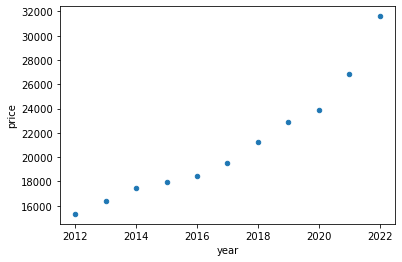

In [142]:
avgs.plot.scatter('year', 'price')

<AxesSubplot:xlabel='mileage', ylabel='price'>

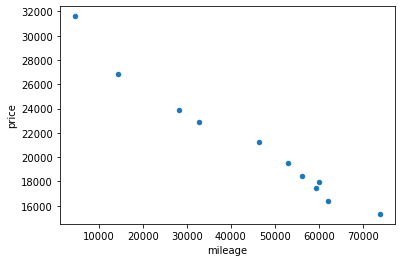

In [143]:
avgs.plot.scatter('mileage', 'price')

In [155]:
sources = main.groupby('source').mean().reset_index()
sources.head()

,source,year,price,rating,mileage,owners
0,0,2016.500000,20092.087743,2.294546,48215.767819,1.632019
1,1,2017.439877,19675.586845,2.448099,52387.641316,1.559096


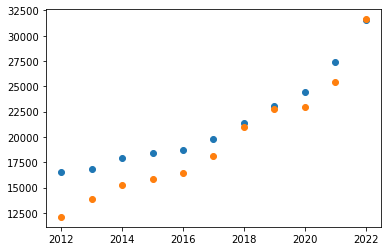

In [161]:
online = filtered[filtered['source']==0]
os = online.groupby(['source','year']).mean().reset_index()
dealer = filtered[filtered['source']==1]
ds = dealer.groupby(['source','year']).mean().reset_index()

plt.scatter(os['year'], os['price'])
plt.scatter(ds['year'], ds['price'])
plt.show()

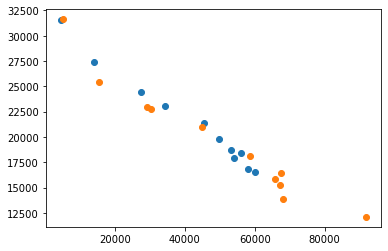

In [162]:
plt.scatter(os['mileage'], os['price'])
plt.scatter(ds['mileage'], ds['price'])
plt.show()

In [170]:
temp = ds.copy()
temp.rename(columns={'price':'dprice', 'mileage':'dmileage'}, inplace=True)
ovsd = pd.concat([os, temp], axis=1)
ovsd['difference'] = ovsd['price'] - ovsd['dprice']
ovsd['mdiff'] = ovsd['mileage'] - ovsd['dmileage']
ovsd

,source,year,price,rating,mileage,owners,source,year,dprice,rating,dmileage,owners,difference,mdiff
0,0,2012,16582.194690,1.787611,60087.902655,1.867257,1,2012,12108.200000,2.400000,91717.800000,2.500000,4473.994690,-31629.897345
1,0,2013,16830.562893,1.937107,58053.355346,1.814465,1,2013,13839.800000,2.550000,68086.000000,2.050000,2990.762893,-10032.644654
2,0,2014,17915.898113,2.369811,53945.890566,1.830189,1,2014,15221.578947,2.368421,67214.210526,2.210526,2694.319166,-13268.319960
3,0,2015,18371.475771,2.299559,55974.515419,1.819383,1,2015,15807.634146,2.560976,65809.317073,2.219512,2563.841625,-9834.801655
4,0,2016,18728.947284,2.253994,53322.643770,1.781150,1,2016,16465.704545,2.477273,67629.045455,2.022727,2263.242739,-14306.401685
5,0,2017,19841.343874,2.335968,49805.134387,1.664032,1,2017,18156.763889,2.375000,58652.652778,2.083333,1684.579985,-8847.518390
6,0,2018,21404.773176,2.418146,45408.293886,1.485207,1,2018,21005.123894,2.407080,44818.654867,1.504425,399.649282,589.639018
7,0,2019,23042.745000,2.485000,34258.125000,1.382500,1,2019,22775.772727,2.461538,30304.314685,1.157343,266.972273,3953.810315
8,0,2020,24449.049587,2.404959,27410.479339,1.214876,1,2020,22991.284884,2.412791,29107.872093,1.127907,1457.764703,-1697.392754
9,0,2021,27380.096491,2.429825,13982.903509,1.070175,1,2021,25386.478261,2.500000,15458.586957,1.065217,1993.618230,-1475.683448


In [145]:
def filterMakeModel(make, model):
    return filtered[(filtered['make']==make) & (filtered['model']==model)]

In [146]:
tyt = filterMakeModel('Toyota','Corolla')
tyt.head()

,id,year,make,model,trim,price,rating,diff,mileage,excolor,intcolor,accidents,owners,use,source
0,2T1BURHE1HC900862,2017,Toyota,Corolla,SE Manual,18999.0,2.0,$405 off avg. list price,54737.0,Silver,Black,0,3,Personal,0
1,5YFBURHE8KP929721,2019,Toyota,Corolla,LE CVT,19990.0,2.0,$140 off avg. list price,54943.0,Gray,Black,0,1,Personal,0
2,2T1BURHE1KC207104,2019,Toyota,Corolla,LE CVT,18990.0,4.0,"$1,599 off avg. list price",38274.0,Red,Gray,0,1,Personal,0
3,2T1BU4EE0DC966126,2013,Toyota,Corolla,S Automatic,14990.0,4.0,"$1,694 off avg. list price",61945.0,White,Black,0,3,Fleet,0
4,JTDEPRAE6LJ020543,2020,Toyota,Corolla,LE CVT,19990.0,4.0,"$1,000 off avg. list price",60331.0,Black,Black,0,1,Fleet,0


In [130]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [131]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [147]:
cats = ['trim', 'excolor', 'intcolor', 'use']
nums = ['year', 'price', 'mileage', 'accidents', 'owners', 'source']
encoded = pd.get_dummies(tyt[cats])
prepped = pd.concat([tyt[nums], encoded], axis=1)
prepped.head()

,year,price,mileage,accidents,owners,source,trim_50th Anniversary Special Edition CVT,trim_Hybrid LE CVT,trim_L Automatic,trim_L CVT,...,excolor_White,intcolor_Beige,intcolor_Black,intcolor_Blue,intcolor_Brown,intcolor_Gray,intcolor_Unknown,intcolor_White,use_Fleet,use_Personal
0,2017,18999.0,54737.0,0,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2019,19990.0,54943.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2019,18990.0,38274.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2013,14990.0,61945.0,0,3,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,2020,19990.0,60331.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [196]:
X = prepped.drop('price', axis=1)
y = prepped['price']
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8853296341119912

In [197]:
X['pred'] = X.apply(lambda x: (reg.predict(np.array(x).reshape(1,-1))[0]), axis=1)

D:\Code\miniconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Code\miniconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Code\miniconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Code\miniconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Code\miniconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Code\miniconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegressi

In [199]:
predicted = pd.concat([tyt, X['pred']], axis=1)
predicted['difference'] = predicted['price'] - predicted['pred']
predicted

,id,year,make,model,trim,price,rating,diff,mileage,excolor,intcolor,accidents,owners,use,source,pred,difference
0,2T1BURHE1HC900862,2017,Toyota,Corolla,SE Manual,18999.0,2.0,$405 off avg. list price,54737.0,Silver,Black,0,3,Personal,0,19583.222394,-584.222394
1,5YFBURHE8KP929721,2019,Toyota,Corolla,LE CVT,19990.0,2.0,$140 off avg. list price,54943.0,Gray,Black,0,1,Personal,0,20175.189350,-185.189350
2,2T1BURHE1KC207104,2019,Toyota,Corolla,LE CVT,18990.0,4.0,"$1,599 off avg. list price",38274.0,Red,Gray,0,1,Personal,0,21340.138601,-2350.138601
3,2T1BU4EE0DC966126,2013,Toyota,Corolla,S Automatic,14990.0,4.0,"$1,694 off avg. list price",61945.0,White,Black,0,3,Fleet,0,15854.601106,-864.601106
4,JTDEPRAE6LJ020543,2020,Toyota,Corolla,LE CVT,19990.0,4.0,"$1,000 off avg. list price",60331.0,Black,Black,0,1,Fleet,0,20411.295679,-421.295679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2T1BURHE9HC939148,2017,Toyota,Corolla,LE CVT,15777.0,3.0,At or near avg. list price,64548.0,Gray,Beige,1,2,Fleet,1,15578.469810,198.530190
126,2T1BURHE0GC669094,2016,Toyota,Corolla,L Automatic,19995.0,1.0,"$1,697 above avg. list price",43245.0,Unknown,Unknown,0,2,Personal,1,19094.234573,900.765427
127,5YFEPMAE8NP275910,2022,Toyota,Corolla,LE CVT,21899.0,3.0,$265 above avg. list price,5212.0,Gray,Black,1,1,Personal,1,22909.763509,-1010.763509
130,2T1BU4EE7DC939411,2013,Toyota,Corolla,L Manual,14290.0,1.0,$783 above avg. list price,80054.0,Silver,Unknown,1,2,Fleet,1,13799.724494,490.275506
